<a href="https://colab.research.google.com/github/remisoulignac/scm_optim_problems/blob/main/SC0X_Python_Samples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ortools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.5 MB 422 kB/s 
     |████████████████████████████████| 408 kB 47.1 MB/s 
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.17.3
    Uninstalling protobuf-3.17.3:
      Successfully uninstalled protobuf-3.17.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.2+zzzcolab20220719082949 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.21.4 which is incompatible.
tensorflow-metadata 1.9.0 requires protobuf<4,>=3.13, but you have protobuf 4.21.4 which is incompatible.
google-cloud-bigquery-storage 1.1.2 requires protobuf<4.0.0dev, but you have protobuf 4.21.4 which is incompatible.
google-api-core 1.31.6 requires protobuf<4.0.0dev,>=3.12.0; python_version > "3", but you have protob

#Problem : Traveling Salesman Problem
Find the shortest path visiting each node, starting from CH

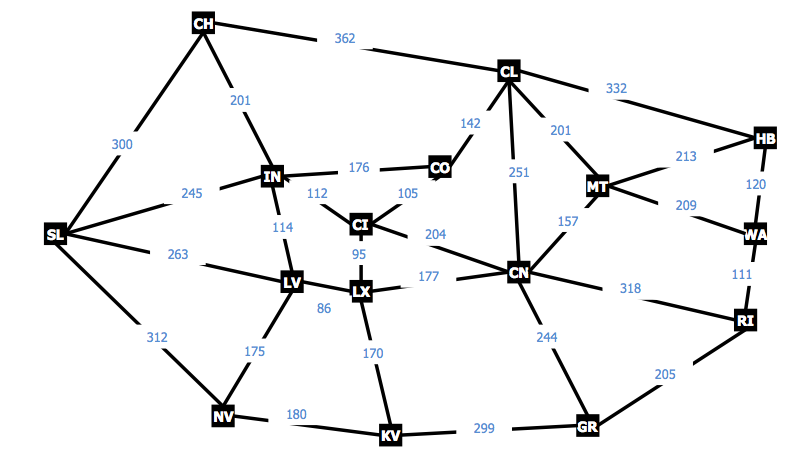

In [ ]:

#see OR-TOOLS documentation : https://developers.google.com/optimization/routing/tsp

import numpy as np
from __future__ import print_function
import math, sys
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp
np.set_printoptions(suppress=True,linewidth=sys.maxsize,threshold=sys.maxsize)


inf=-1
cities=[ "CH", "CL", "HB", "SL", "IN", "CO", "MT", "WA", "CI", "CN", "RI", "LV", "LX", "NV", "KV", "GR" ]
distances=np.array([
# [ "CH", "CL", "HB", "SL", "IN", "CO", "MT", "WA", "CI", "CN", "RI", "LV", "LX", "NV", "KV", "GR" ]
  [ 000,  362,  inf,  300,  201,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf  ], #CH
  [ inf,  000,  332,  inf,  inf,  142,  201,  inf,  inf,  251,  inf,  inf,  inf,  inf,  inf,  inf  ], #CL
  [ inf,  inf,  000,  inf,  inf,  inf,  213,  120,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf  ], #HB
  [ inf,  inf,  inf,  000,  245,  inf,  inf,  inf,  inf,  inf,  inf,  263,  inf,  312,  inf,  inf  ], #SL
  [ inf,  inf,  inf,  inf,  000,  176,  inf,  inf,  112,  inf,  inf,  114,  inf,  inf,  inf,  inf  ], #IN
  [ inf,  inf,  inf,  inf,  inf,  000,  inf,  inf,  105,  inf,  inf,  inf,  inf,  inf,  inf,  inf  ], #CO
  [ inf,  inf,  inf,  inf,  inf,  inf,  000,  209,  inf,  157,  inf,  inf,  inf,  inf,  inf,  inf  ], #MT
  [ inf,  inf,  inf,  inf,  inf,  inf,  inf,  000,  inf,  inf,  111,  inf,  inf,  inf,  inf,  inf  ], #WA
  [ inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  000,  204,  inf,  inf,   95,  inf,  inf,  inf  ], #CI
  [ inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  000,  318,  inf,  177,  inf,  inf,  244  ], #CN
  [ inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  000,  inf,  inf,  inf,  inf,  205  ], #RI
  [ inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  000,   86,  175,  inf,  inf  ], #LV
  [ inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  000,  inf,  170,  inf  ], #LX
  [ inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  000,  180,  inf  ], #NV
  [ inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  000,  299  ], #KV
  [ inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  000  ]  #GR
])

triinf=np.tril_indices(distances.shape[0], -1)
distances[triinf] = distances.T[triinf] #https://stackoverflow.com/questions/16444930/copy-upper-triangle-to-lower-triangle-in-a-python-matrix
print(distances)

def print_solution(manager, routing, solution):
    """Prints solution on console."""
    print('Objective: {}'.format(solution.ObjectiveValue()))
    for route_nbr in range(routing.vehicles()):
      index = routing.Start(route_nbr)
      plan_output = 'Route:\n'
      route_distance = 0
      while not routing.IsEnd(index): 
          plan_output += ' {} --'.format(cities[manager.IndexToNode(index)])
          previous_index = index
          index = solution.Value(routing.NextVar(index))
          dist = routing.GetArcCostForVehicle(previous_index, index, 0)
          plan_output+='{}km->'.format(dist)
          route_distance += dist
      plan_output += ' {}\n'.format(cities[manager.IndexToNode(index)])
      plan_output += ' Route distance: {}m\n'.format(route_distance)
      print(plan_output)


# Create the routing index manager.
# identify the number of nodes, the number of vehicules, the start and end of the route 
manager = pywrapcp.RoutingIndexManager(distances.shape[0],
                                       1, 0)

# Create Routing Model.
routing = pywrapcp.RoutingModel(manager)

def distance_callback(from_index, to_index):
    """Returns the distance between the two nodes."""
    # Convert from routing variable Index to distance matrix NodeIndex.
    from_node = manager.IndexToNode(from_index)
    to_node = manager.IndexToNode(to_index)
    return distances[from_node][to_node]

transit_callback_index = routing.RegisterTransitCallback(distance_callback)

# Define cost of each arc.
routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

# Setting first solution heuristic.
search_parameters = pywrapcp.DefaultRoutingSearchParameters()
search_parameters.first_solution_strategy = (
    routing_enums_pb2.FirstSolutionStrategy.GLOBAL_CHEAPEST_ARC)

# Solve the problem.
solution = routing.SolveWithParameters(search_parameters)

# Print solution on console.
if solution:
    print_solution(manager, routing, solution)


[[  0 362  -1 300 201  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1]
 [362   0 332  -1  -1 142 201  -1  -1 251  -1  -1  -1  -1  -1  -1]
 [ -1 332   0  -1  -1  -1 213 120  -1  -1  -1  -1  -1  -1  -1  -1]
 [300  -1  -1   0 245  -1  -1  -1  -1  -1  -1 263  -1 312  -1  -1]
 [201  -1  -1 245   0 176  -1  -1 112  -1  -1 114  -1  -1  -1  -1]
 [ -1 142  -1  -1 176   0  -1  -1 105  -1  -1  -1  -1  -1  -1  -1]
 [ -1 201 213  -1  -1  -1   0 209  -1 157  -1  -1  -1  -1  -1  -1]
 [ -1  -1 120  -1  -1  -1 209   0  -1  -1 111  -1  -1  -1  -1  -1]
 [ -1  -1  -1  -1 112 105  -1  -1   0 204  -1  -1  95  -1  -1  -1]
 [ -1 251  -1  -1  -1  -1 157  -1 204   0 318  -1 177  -1  -1 244]
 [ -1  -1  -1  -1  -1  -1  -1 111  -1 318   0  -1  -1  -1  -1 205]
 [ -1  -1  -1 263 114  -1  -1  -1  -1  -1  -1   0  86 175  -1  -1]
 [ -1  -1  -1  -1  -1  -1  -1  -1  95 177  -1  86   0  -1 170  -1]
 [ -1  -1  -1 312  -1  -1  -1  -1  -1  -1  -1 175  -1   0 180  -1]
 [ -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1 170 180   0 

# Simple Network design problem
Christos's Yogurt is a popular greek yogurt manufacturer in the United States. The company has production facilities in Chicago, Atlanta and Denver. Each facility can make only 10000 containers of yogurt per week.

One of Christos's main customers, Dairy Bucket, has placed a large order. Dairy Bucket distributes their order over their 3 facilities located in Boston, Seattle and Tampa. Christos wants to minimize his transportation costs while satisfying Dairy Bucket's order.

The transportation costs between each production and destination facility are as follows:
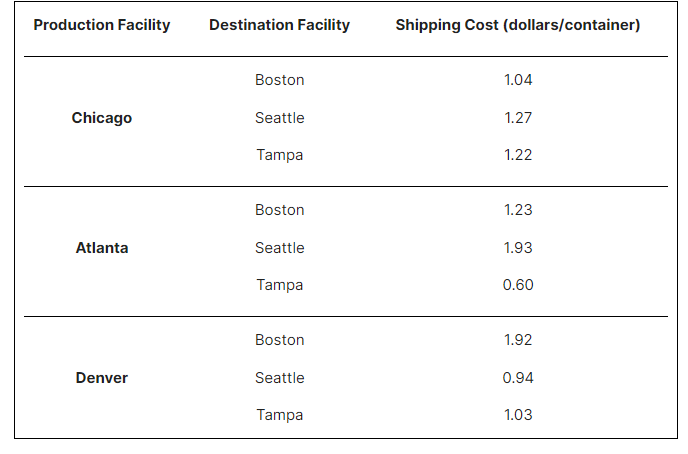

Additionally, Dairy Bucket's demand for all cities are as follows:

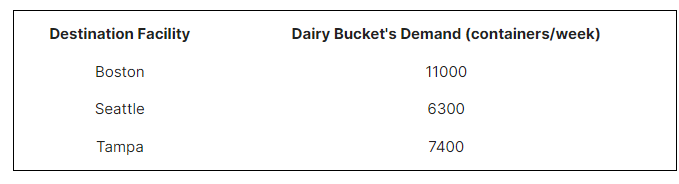

Help Christos to optimize his transportation costs.

In [ ]:
#solution with matrix formulation
#see examples in SC2X for direct constraint and objective function formulation with variables

from ortools.linear_solver import pywraplp
import numpy as np

def create_data_model():
  """Stores the data for the problem."""
  data = {}
  # Shipping Cost (dollars/container)
  #                Boston	Seattle	Tampa
  # Chicago       
  # Atlanta
  # Denver
  data['obj_coeffs'] = [
   [1.04, 1.27, 1.22],
   [1.23, 1.93, 0.60],
   [1.92, 0.94, 1.03]]

  data['constraint_coeffs_min_max'] = [  
      #Dairy Bucket's Demand (containers/week)
      ([[1, 0, 0],
        [1, 0, 0],
        [1, 0, 0]], 11000, 11000),
      ([[0, 1, 0],
        [0, 1, 0],
        [0, 1, 0]], 6300, 6300),        
      ([[0, 0, 1],
        [0, 0, 1],
        [0, 0, 1]], 7400, 7400),
      
     #quantités expédiées

      ([[1, 1, 1],
        [0, 0, 0],
        [0, 0, 0]], 0, 10000),
      ([[0, 0, 0],
        [1, 1, 1],
        [0, 0, 0]], 0, 10000),
      ([[0, 0, 0],
        [0, 0, 0],
        [1, 1, 1]], 0, 10000)  ]

  return data


data = create_data_model()
# Create the mip solver with the SCIP backend.
solver = pywraplp.Solver.CreateSolver('CBC')
infinity = solver.infinity()

x=[[solver.IntVar(0, infinity, f'x[{j},{i}]') for i in range(len(data['obj_coeffs'][j]))] for j in range(len(data['obj_coeffs']))] 

for c in data['constraint_coeffs_min_max']:
  constraint = solver.RowConstraint(c[1], c[2], '')
  for ji,v in np.ndenumerate(c[0]):
    constraint.SetCoefficient(x[ji[0]][ji[1]], v*1.0)
print('Number of constraints =', solver.NumConstraints())

objective = solver.Objective()
for ji,v in np.ndenumerate(data['obj_coeffs']):
  objective.SetCoefficient(x[ji[0]][ji[1]], v*1.0)
objective.SetMinimization()

status = solver.Solve()

if status == pywraplp.Solver.OPTIMAL:
  print('Objective value =', solver.Objective().Value())
  for j in x:
    for i in j:
      print(i.name(), ' = ', i.solution_value())
  print()
  print('Problem solved in %f milliseconds' % solver.wall_time())
  print('Problem solved in %d iterations' % solver.iterations())
  print('Problem solved in %d branch-and-bound nodes' % solver.nodes())
else:
  print('The problem does not have an optimal solution.')


Number of constraints = 6
Objective value = 21992.0
x[0,0]  =  10000.0
x[0,1]  =  0.0
x[0,2]  =  0.0
x[1,0]  =  1000.0
x[1,1]  =  0.0
x[1,2]  =  7400.0
x[2,0]  =  0.0
x[2,1]  =  6300.0
x[2,2]  =  0.0

Problem solved in 5.000000 milliseconds
Problem solved in 0 iterations
Problem solved in 0 branch-and-bound nodes


# Simulation of Single Period Inventoy Management- Suzy Snacks (Module 5 -Unit 3 - QQ6)
Suzie	sells	sushi	in	the	Seychelles	from	her	shack	at	the	seashore	.		Each day	she	buys	certain	fish	from	the	local	fishermen	and	creates	a	number of	her	special	rolls.		If	she	has	extra	unsold	rolls	at	the	end	of	the	day,	she has	to	throw	them	out	(no	one	eats	day	old	sushi).		If	she	sells	out	what she	has	during	a	day,	she	is	done	and	cannot	make	any	more	rolls	that day.	Each	roll	costs	25	Seychelles	Rupees	(SCR)	to	make	and	she	sells	them	for	80	SCR	each.			
• The	demand	for	her	sushi	rolls	is	highly	variable, normally distributed with a a mean = 20 pieces/day and a standard deviation = 5 pieces/day

How	many	rolls	she	should	make	each	day	to	maximize	her	profit ?


[1170. 1330.  530.  370. 1650.  930.  850.  290.  610.  210.]
max at :
    Production      Profit
12          22  930.885067


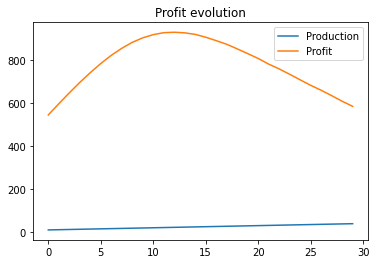

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

def simulate_profit(mean_demand = 20, 
             std_dev_demand = 5,
             sales_price = 80,
             cost_per_unit = 25,
             production=30,
             days_per_run = 300,
             num_runs = 1000):
  #note : we use floor() instead of round() to simulate INT function of Excel as used in the sample
  #with round(), the mean reaches ~830 instead of ~800
  demand = np.floor(np.random.normal(
      mean_demand,
      std_dev_demand,
      size=(num_runs, days_per_run)
  ))
  production = np.full((num_runs, days_per_run), production)
  short=np.maximum(demand-production, 0)
  extra=np.maximum(production-demand, 0)
  revenue=np.minimum(demand, production)*sales_price
  cost=production*cost_per_unit
  profit = revenue-cost
  return profit

#test run 
test_run=simulate_profit(num_runs=100)
print(test_run[0][0:10])
# stats for the means of the runs
pd.DataFrame(data=test_run.mean(axis=1)).describe()

# vary production from 10 to 40
profits={'Production':np.arange(10, 40), 'Profit':[simulate_profit(production=i).mean() for i in range(10,40)]}
df = pd.DataFrame(data=profits)
df.plot(kind='line', title='Profit evolution')
print("max at :")
print( df[df.Profit==df.Profit.max()])